In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
#from sklearn.ensemble import HistGradientBoostingRegressor
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
test_read = pd.read_csv('new_features_datasets/F_test.csv')
training_and_validation_read = pd.read_csv('new_features_datasets/F_training_and_validation.csv')

In [3]:
common_columns = training_and_validation_read.columns.intersection(test_read.columns)

# Reorder the columns in both DataFrames to match the order of 'common_columns'
test = test_read[common_columns]
training_and_validation = training_and_validation_read[common_columns]

# Add the 'pv_measurement' column from 'test' to 'training_and_validation'
training_and_validation['pv_measurement'] = training_and_validation_read['pv_measurement']

In [4]:
training_and_validation['date_forecast'] = pd.to_datetime(training_and_validation['date_forecast'])
training_and_validation = training_and_validation[training_and_validation['date_forecast'] > pd.to_datetime('2019-07-01')]
#training_and_validation = training_and_validation[training_and_validation['date_forecast'] < pd.to_datetime('2023-04-01')]

# Define the date for the split
split_date = pd.to_datetime('2022-10-22')

# Split the DataFrame into training and test sets
train_fit = training_and_validation[training_and_validation['date_forecast'] <= split_date]
train_fit.reset_index(drop=True, inplace=True)
X_train = train_fit.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_train = train_fit['pv_measurement']  # Target variable
test_fit = training_and_validation[training_and_validation['date_forecast'] > split_date]
test_fit.reset_index(drop=True, inplace=True)
X_test = test_fit.drop(columns=['pv_measurement'])
X_test = X_test.drop(columns=['date_forecast'])

y_test = test_fit['pv_measurement']  # Target variable

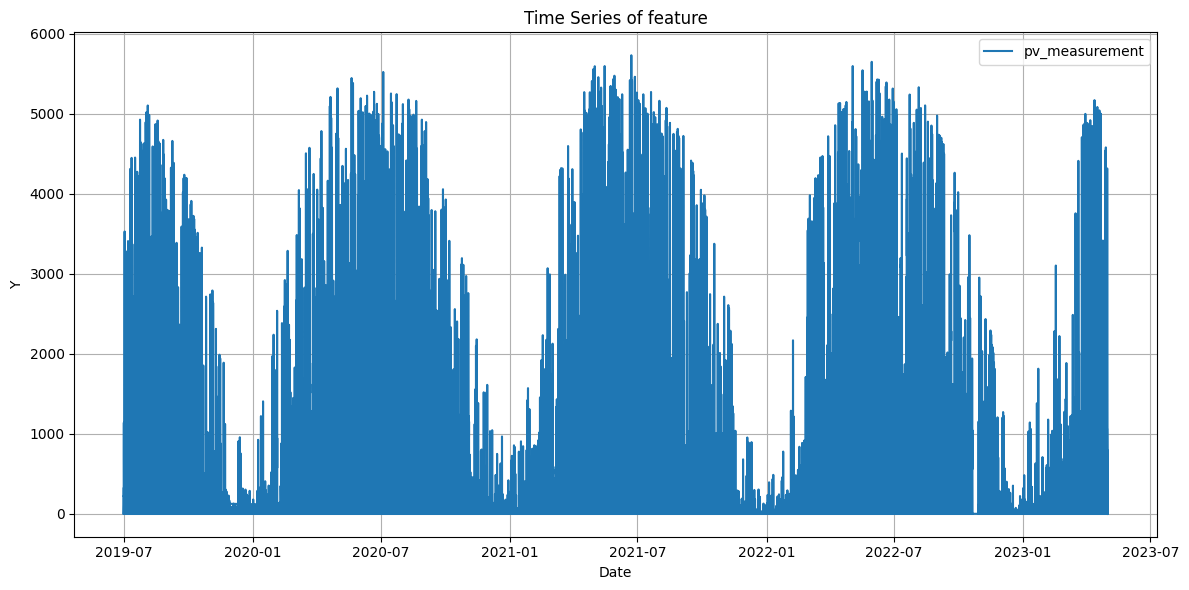

In [5]:
training_and_validation['date_forecast'] = pd.to_datetime(training_and_validation['date_forecast'])

# Plot the time series
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(training_and_validation['date_forecast'], training_and_validation['pv_measurement'], label='pv_measurement')
plt.xlabel('Date')
plt.ylabel('Y')
plt.title('Time Series of feature')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.show()

### Random forest

In [6]:
# Step 2: Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=400, max_depth=10, min_samples_split=2, min_samples_leaf=2)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Step 3: Evaluate the model's performance on the validation data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error (MSE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error on validation data: {mae:.2f}')

In [ ]:
'''
feature_importance = rf_model.feature_importances_
your_feature_names = X_test.columns.tolist()
feature_names = pd.DataFrame({'Feature': your_feature_names, 'Importance': feature_importance})
# Sort by importance in descending order
feature_names = feature_names.sort_values(by='Importance', ascending=False)
# Print or view the sorted feature importance
print(feature_names)
'''

"\nfeature_importance = rf_model.feature_importances_\nyour_feature_names = X_test.columns.tolist()\nfeature_names = pd.DataFrame({'Feature': your_feature_names, 'Importance': feature_importance})\n# Sort by importance in descending order\nfeature_names = feature_names.sort_values(by='Importance', ascending=False)\n# Print or view the sorted feature importance\nprint(feature_names)\n"

In [ ]:
'''
# Set your chosen threshold
threshold = 0.001  # Adjust this value based on your specific needs
# Select the features with importance scores above the threshold
selected_features = feature_names[feature_names['Importance'] > threshold]['Feature']
'''

"\n# Set your chosen threshold\nthreshold = 0.001  # Adjust this value based on your specific needs\n# Select the features with importance scores above the threshold\nselected_features = feature_names[feature_names['Importance'] > threshold]['Feature']\n"

In [ ]:
training2 = training_and_validation.drop(columns=['pv_measurement'])
x_training = training2.drop(columns=['date_forecast'])
x_training.reset_index(drop=True, inplace=True)

y_training = training_and_validation['pv_measurement']  # Target variable
y_training.reset_index(drop=True, inplace=True)

test = test.drop(columns = ['date_forecast'])

In [ ]:
rf_model2 = RandomForestRegressor(n_estimators=400, max_depth=10, min_samples_split=2, min_samples_leaf=2)  # You can adjust hyperparameters
rf_model2.fit(x_training, y_training)

# Step 3: Evaluate the model's performance on the validation data
y_pred_rf = rf_model2.predict(test)

In [ ]:
test2 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test2['prediction'] = y_pred_rf
sample_submission = sample_submission[['id']].merge(test2[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('Submissions/submission_16.csv', index=False)

#### HGB regression

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize the HistGradientBoostingRegressor model
hgb_regressor = HistGradientBoostingRegressor()

# Train the model
hgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = hgb_regressor.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 63.70


In [ ]:
hgb_regressor.fit(x_training, y_training)

# Step 3: Evaluate the model's performance on the validation data
y_pred_hgb = hgb_regressor.predict(test)

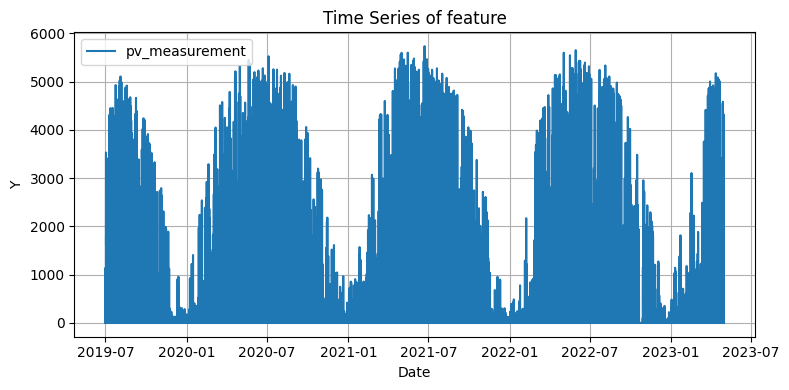

In [ ]:
training_and_validation['date_forecast'] = pd.to_datetime(training_and_validation['date_forecast'])

# Plot the time series
plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
plt.plot(training_and_validation['date_forecast'], training_and_validation['pv_measurement'], label='pv_measurement')
plt.xlabel('Date')
plt.ylabel('Y')
plt.title('Time Series of feature')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show or save the plot
plt.show()

In [ ]:
test3 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test3['prediction'] = y_pred_hgb

# Find the minimum and maximum values of the 'prediction' column
min_value = test3['prediction'].min()
max_value = test3['prediction'].max()

# Define the scaling range
new_min = 0
new_max = 5600

# Perform min-max scaling
test3['scaled_prediction'] = ((test3['prediction'] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min


sample_submission = sample_submission[['id']].merge(test3[['id', 'scaled_prediction']], on='id', how='left')
sample_submission.to_csv('Submissions/submission_17.csv', index=False)

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation feature importances
result = permutation_importance(hgb_regressor, X_train, y_train, n_repeats=30, random_state=0)

# Get the importances and feature names
importances = result.importances_mean
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

KeyboardInterrupt: 

In [ ]:
# Select features with importance values above 0
selected_features = feature_importance_df[feature_importance_df['Importance'] > 0]
new_features = ['Location_B', 'Location_C']
selected_features = pd.concat([selected_features, pd.DataFrame({'Feature': new_features, 'Importance': [0, 0]})], ignore_index=True)

In [ ]:
train_X2 = X_train[selected_features['Feature']]

In [ ]:
# Initialize the HistGradientBoostingRegressor model
#hgb_regressor2 = HistGradientBoostingRegressor()

# Train the model
hgb_regressor.fit(X_train[selected_features['Feature']], y_train)

# Make predictions on the test set
y_pred = hgb_regressor.predict(X_test[selected_features['Feature']])

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 63.94


In [ ]:
hgb_regressor.fit(x_training[selected_features['Feature']], y_training)

# Step 3: Evaluate the model's performance on the validation data
y_pred_hgb = hgb_regressor.predict(test[selected_features['Feature']])

In [ ]:
test3 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test3['prediction'] = y_pred_hgb
sample_submission = sample_submission[['id']].merge(test3[['id', 'prediction']], on='id', how='left')
#sample_submission.to_csv('Submissions/submission_17.csv', index=False)